# Using Machine Learning Tools 2024, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.
 

During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above. 
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


## 1. Loading and displaying data + initial model training

### Loading & displaying data

In [1]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [2]:
# View basic information of the data
print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 214.7 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,157,157,157,157,157,158,158,...,149,163,175,175,175,175,175,149,149,149
2,2,187,188,188,188,188,188,188,188,188,...,202,201,200,199,199,199,198,195,195,195
3,2,211,211,212,212,212,212,212,212,211,...,235,234,233,231,230,229,229,229,229,163
4,13,164,167,170,172,176,179,180,184,185,...,133,163,163,163,164,179,179,179,179,179


We can see each row contains 1024 pixels value (32*32 image pixels) and the corresponding label

In [3]:
# View the labels of dataset
labels = train_data['label'].unique()
labels.sort()
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

We can see the dataset does not contains 9 and 25 which is 'J' and 'Z', now we display one sample image for each class

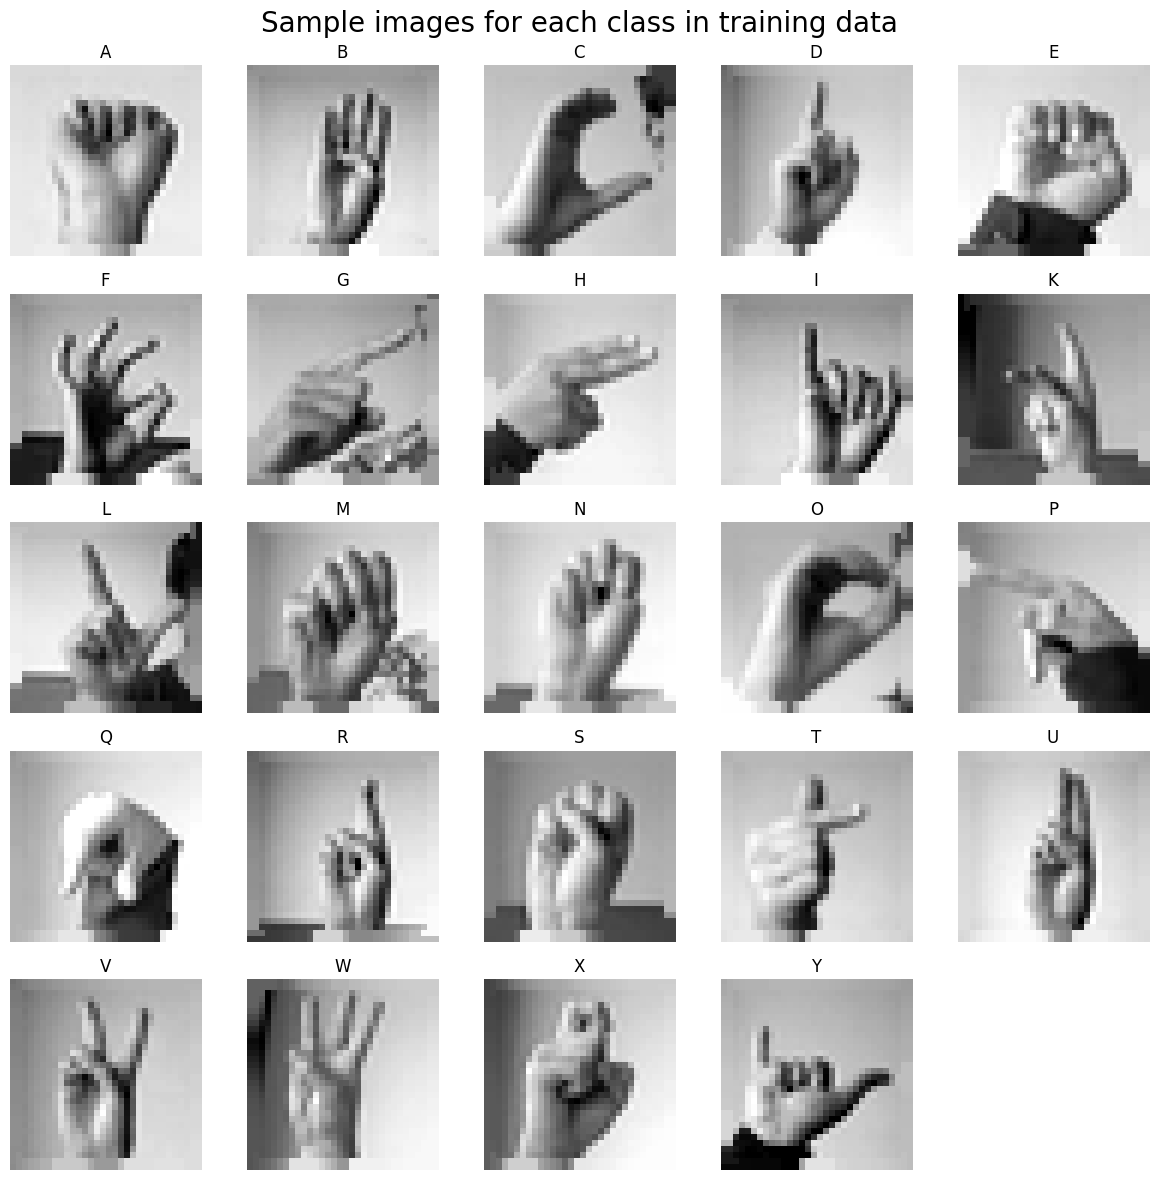

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Extract labels and pixel values
train_labels = train_data['label']
test_labels = test_data['label']
train_images = train_data.drop(columns=['label']).values

# Reshape the images from 1D to 2D (32x32)
train_images = train_images.reshape(-1, 32, 32)

# Display a sample of each letter in the training dataset
unique_labels = np.unique(train_labels)
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

plt.suptitle("Sample images for each class in training data", fontsize=20)

for i, label in enumerate(unique_labels):
    ax = axes[i // 5, i % 5]
    # Find the first image corresponding to the label
    img_index = np.where(train_labels == label)[0][0]
    ax.imshow(train_images[img_index], cmap='gray')
    ax.set_title(chr(label + 65))  # Convert label to corresponding letter
    ax.axis('off')

# Hide the remaining empty axes
for j in range(i + 1, 25):
    ax = axes[j // 5, j % 5]
    ax.axis('off')

plt.tight_layout()
plt.show()

Here we roughly see the distribution for each class

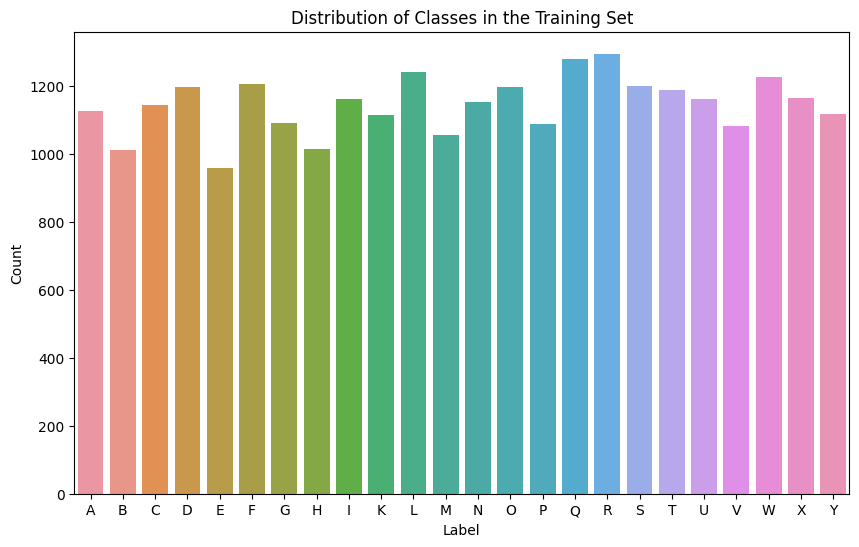

In [5]:
import seaborn as sns

# Plot the distribution of classes in the training set
plt.figure(figsize=(10, 6))
sns.countplot(x=train_labels)
plt.title('Distribution of Classes in the Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(0, 24), labels=[chr(i + 65) for i in unique_labels])
plt.show()

We can see the distribution of each class for the training dataset is quite balanced, all the class has around 1000 to 1200 images, so we don't have to apply any upsampling or downsampling to the training data. Now we can prepare the training and test data.

In [6]:
# Get labels and images
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

Notice that the label 9 and label 25 is missing so here in the data preprocessing I shift the label after 8 to one index smaller. The reason is I will use categorical cross-entropy as the loss function and this loss function requires continuous integers without gap, besides when I encode the label using one-hot encoding, they also need continuous range.

There have some other preprocess steps:
- reshape the 1024 pixels to 32*32 matrix, so we can treat it as image instead of a seqential of values
- normalize the pixel value by /255, since many deep learning models perform better when the input values are small and center around zero, large input can cause issues with numerical stability, leading to problems like exploding or vanishing graidents, which may hinder or slow down the training process.
- one hot encoding: although the label we have are already numerical value, but to avoid ordianl relationship. I fwe simply label the class with integers, the model might mistakenly interpret these numbers as having some order or hierarchy. One hot encoding removes the risk by representing each class as a binary vector. Besides, one hot encoding is used to facilitate categorical cross-entropy loss function.

After preprocess the data, we need to split the data, since we are told to have a fixed validation data using only supplied test.csv file, we split the data in testing dataset into 50:50 for validation and test to provide independent data and unbiased accuracy later. In addtion, I use stratify when spliting to make sure that both dataset has same distribution of class label.

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define a function for preprocessing
def preprocess_data(X, y):
    # Adjust labels to be in range 0-23
    y = np.array([i if i < 9 else i - 1 for i in y])
    
    # Reshape images to 32x32x1
    X = X.reshape(-1, 32, 32, 1)
    
    # Normalize pixel values
    X = X / 255.0
    
    # One-hot encode labels
    y_enc = to_categorical(y, num_classes=24)
    
    return X, y_enc

# Preprocess training data
X_train, y_train = preprocess_data(X_train, y_train)

# Preprocess testing data and create validation and final test sets
X_test, y_test = preprocess_data(X_test, y_test)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify=y_test, test_size=0.5, random_state=42)

### Training baseline model

Now we have our dataset ready to use, we can train both densely connected and CNN model as the baseline models.

But before that, I implement a function that can set the random seed so we can reproduce the same result every time we run.

In [8]:
import random
import tensorflow as tf

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.experimental.enable_op_determinism()

set_seed(42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the densely connected base model
dense_base = Sequential([
    Flatten(input_shape=(32, 32, 1), name='flatten_1'),
    Dense(256, activation='relu', name='dense_1'),
    Dense(24, activation='softmax', name='dense_2')
], name='MLP_base')

dense_base.summary()

Model: "MLP_base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 24)                6168      
                                                                 
Total params: 268568 (1.02 MB)
Trainable params: 268568 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the model
set_seed(42)
dense_base.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MLP base model
history_dense = dense_base.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
858/858 [==============================] - 6s 5ms/step - loss: 2.1782 - accuracy: 0.3399 - val_loss: 1.7486 - val_accuracy: 0.4445
Epoch 2/20
858/858 [==============================] - 4s 4ms/step - loss: 1.2882 - accuracy: 0.5931 - val_loss: 1.4166 - val_accuracy: 0.5463
Epoch 3/20
858/858 [==============================] - 4s 5ms/step - loss: 0.9562 - accuracy: 0.6991 - val_loss: 1.2012 - val_accuracy: 0.6221
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 0.7597 - accuracy: 0.7585 - val_loss: 1.1029 - val_accuracy: 0.6584
Epoch 5/20
858/858 [==============================] - 4s 5ms/step - loss: 0.6201 - accuracy: 0.8012 - val_loss: 1.1319 - val_accuracy: 0.6511
Epoch 6/20
858/858 [==============================] - 4s 5ms/step - loss: 0.5111 - accuracy: 0.8359 - val_loss: 0.9913 - val_accuracy: 0.6907
Epoch 7/20
858/858 [==============================] - 4s 5ms/step - loss: 0.4293 - accuracy: 0.8610 - val_loss: 1.1053 - val_accuracy: 0.6746
Epoch 

In order to view the training process clearer, we plot the history accuracy and loss for both training and validation

In [18]:
# Plot the learning curve
def plot_learning_curve(history):
    # Summarize history for accuracy
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

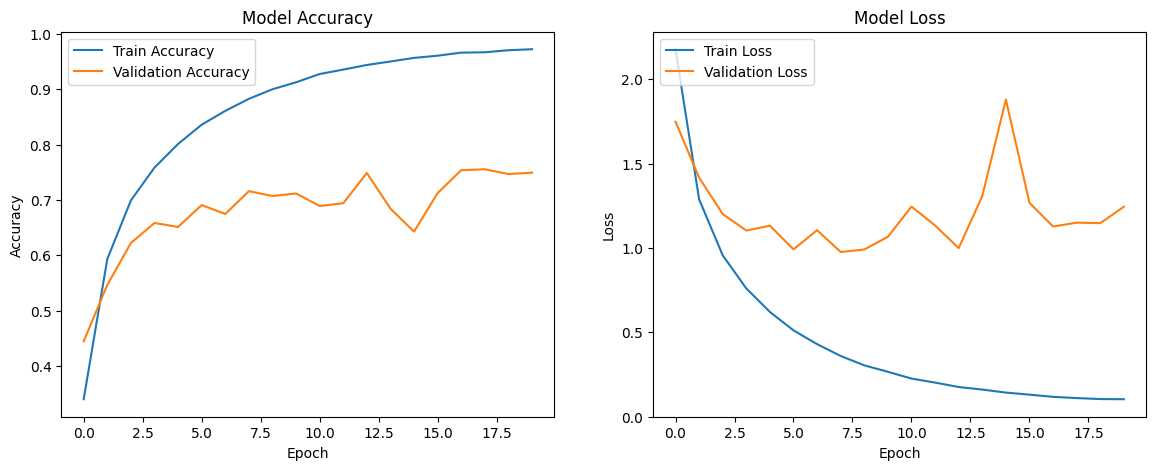

In [19]:
# Plot MLP base curve
plot_learning_curve(history_dense)

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Define the CNN base model
cnn_base = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1), name='conv_1'),
    MaxPooling2D((2, 2), name='max_pool_1'),
    Conv2D(16, (3, 3), activation='relu', name='conv_2'),
    MaxPooling2D((2, 2), name='max_pool_2'),
    Flatten(name='flatten_1'),
    Dense(64, activation='relu', name='dense_1'),
    Dense(24, activation='softmax', name='dense_2')
], name='CNN_base')

cnn_base.summary()

Model: "CNN_base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        160       
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 15, 15, 16)        0         
                                                                 
 conv_2 (Conv2D)             (None, 13, 13, 16)        2320      
                                                                 
 max_pool_2 (MaxPooling2D)   (None, 6, 6, 16)          0         
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                36928     
                                                                 
 dense_2 (Dense)             (None, 24)                156

In [13]:
# Compile the model
set_seed(42)
cnn_base.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = cnn_base.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
858/858 [==============================] - 11s 10ms/step - loss: 1.2514 - accuracy: 0.6353 - val_loss: 0.6549 - val_accuracy: 0.7864
Epoch 2/20
858/858 [==============================] - 8s 10ms/step - loss: 0.1808 - accuracy: 0.9486 - val_loss: 0.4572 - val_accuracy: 0.8589
Epoch 3/20
858/858 [==============================] - 8s 9ms/step - loss: 0.0309 - accuracy: 0.9931 - val_loss: 0.4061 - val_accuracy: 0.8910
Epoch 4/20
858/858 [==============================] - 7s 8ms/step - loss: 0.0094 - accuracy: 0.9979 - val_loss: 0.4629 - val_accuracy: 0.8971
Epoch 5/20
858/858 [==============================] - 7s 8ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.5079 - val_accuracy: 0.9004
Epoch 6/20
858/858 [==============================] - 7s 8ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.5424 - val_accuracy: 0.9044
Epoch 7/20
858/858 [==============================] - 7s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.6560 - val_accuracy: 0.8974
Epo

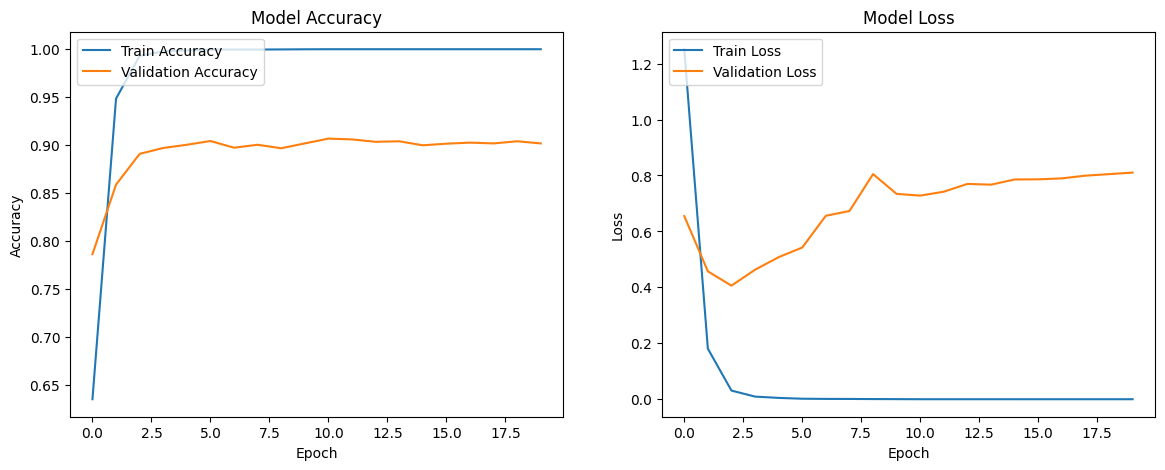

In [21]:
# Plot CNN base curve
plot_learning_curve(history_cnn)

Here we define a fucntion that record and report the following metrics:
- validation accuracy
- unbiased median accuracy
- overall mean accuracy
- letters with highest/lowest accuracy
- individual accuracy for each letter
- most common errors the model made

In [14]:
from sklearn.metrics import confusion_matrix

def accuracy_per_class(y_true, y_pred):
    accuracies = []
    for i in range(24):
        if np.sum(y_true == i) > 0:
            accuracies.append(np.mean(y_pred[y_true == i] == i))
        else:
            print("nan")
            accuracies.append(np.nan) # Handle classes with no samples

    # Filter out NaN values to calculate the median accuracy
    accuracies = [acc for acc in accuracies if not np.isnan(acc)]

    return accuracies

def max_min_accuracy(accuracies):
    # Identify the letters with the highest/lowest individual accuracy
    max_accuracy = np.nanmax(accuracies)
    min_accuracy = np.nanmin(accuracies)

    # Find all classes with the highest accuracy
    highest_accuracy_classes = np.where(accuracies == max_accuracy)[0]
    highest_accuracy_letters = [chr(i + ord('A') + (1 if i >= 9 else 0)) for i in highest_accuracy_classes]

    # Find all classes with the lowest accuracy
    lowest_accuracy_classes = np.where(accuracies == min_accuracy)[0]
    lowest_accuracy_letters = [chr(i + ord('A') + (1 if i >= 9 else 0)) for i in lowest_accuracy_classes]

    # Print the results
    print(f"Letters with Highest Accuracy: {', '.join(highest_accuracy_letters)}")
    print(f"Letters with Lowest Accuracy: {', '.join(lowest_accuracy_letters)}\n")

def most_common_errors(y_true, y_pred):
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Set diagonal to zero to exclude correct classifications
    np.fill_diagonal(conf_matrix, 0)

    # Flatten confusion matrix and sort indices by error count in descending order
    flat_conf_matrix = conf_matrix.flatten()
    sorted_indices = np.argsort(-flat_conf_matrix)

    # Get top non-zero errors
    top_errors_indices = sorted_indices[flat_conf_matrix[sorted_indices] > 0][:3]
    top_errors = flat_conf_matrix[top_errors_indices]
    top_positions = np.unravel_index(top_errors_indices, conf_matrix.shape)

    # Adjust for missing 'J' and convert indices to letters
    def index_to_letter(idx):
        return chr(idx + ord('A') + 1) if idx >= 9 else chr(idx + ord('A'))

    # Print top errors
    if top_errors.size == 0:
        print("No errors detected, the model is perfect")
    else:
        print("Top errors:")
        for i in range(len(top_errors)):
            print(f"* Predict {index_to_letter(top_positions[0][i])} as {index_to_letter(top_positions[1][i])}")
        if len(top_errors) < 3:
            print(f"Only {len(top_errors)} errors detected\n")

def evaluate_model(model_name, model, X_val, y_val):
    model_evaluation = model.evaluate(X_val, y_val, verbose = 0)
    print(f"{model_name} model:\n\nValidation Accuracy: {model_evaluation[1]:.4f}")

    # More evaluation of the model
    y_pred = np.argmax(model.predict(X_val, verbose = 0), axis=1) # calculate y_pred
    y_true = np.argmax(y_val, axis=1) # calculate the ground truth

    # Get the accuracy list
    accuracies = accuracy_per_class(y_true, y_pred)

    # Show unbiased median accuracy
    median_accuracy = np.median(accuracies)
    print(f"Unbiased Median Accuracy: {median_accuracy:.4f}\n")

    # Show letter with max and min accuracy
    max_min_accuracy(accuracies)

    # Show most common errors
    most_common_errors(y_true, y_pred)

    # Show accuracy for each individual letter
    mean_accuracy = np.nanmean(accuracies)
    print(f"Overall Mean Accuracy: {mean_accuracy:.4f}\n")

    # Print each letter and its accuracy
    letters = [chr(i + ord('A')) for i in range(26) if i not in [9, 25]]
    for i, acc in enumerate(accuracies):
        print(f"Letter {letters[i]}: Accuracy {acc:.4f}")


In [15]:
# Evaluate the MLP base model
evaluate_model("Densely connected base", dense_base, X_val, y_val)

Densely connected base model:

Validation Accuracy: 0.7493
Unbiased Median Accuracy: 0.7604

Letters with Highest Accuracy: A, P
Letters with Lowest Accuracy: S

Top errors:
* Predict K as R
* Predict M as S
* Predict V as R
Overall Mean Accuracy: 0.7373

Letter A: Accuracy 1.0000
Letter B: Accuracy 0.9074
Letter C: Accuracy 0.9226
Letter D: Accuracy 0.9426
Letter E: Accuracy 0.9197
Letter F: Accuracy 0.8952
Letter G: Accuracy 0.8966
Letter H: Accuracy 0.8991
Letter I: Accuracy 0.7708
Letter K: Accuracy 0.5091
Letter L: Accuracy 0.9231
Letter M: Accuracy 0.6497
Letter N: Accuracy 0.5448
Letter O: Accuracy 0.5610
Letter P: Accuracy 1.0000
Letter Q: Accuracy 0.8171
Letter R: Accuracy 0.7500
Letter S: Accuracy 0.3902
Letter T: Accuracy 0.5403
Letter U: Accuracy 0.4361
Letter V: Accuracy 0.4740
Letter W: Accuracy 0.6990
Letter X: Accuracy 0.6493
Letter Y: Accuracy 0.5964


In [16]:
# Evaluate the CNN base model
evaluate_model("CNN base", cnn_base, X_val, y_val)

CNN base model:

Validation Accuracy: 0.9018
Unbiased Median Accuracy: 0.9135

Letters with Highest Accuracy: A, F, L, P
Letters with Lowest Accuracy: R

Top errors:
* Predict R as U
* Predict T as H
* Predict W as V
Overall Mean Accuracy: 0.8872

Letter A: Accuracy 1.0000
Letter B: Accuracy 0.9954
Letter C: Accuracy 0.9419
Letter D: Accuracy 0.9344
Letter E: Accuracy 0.9839
Letter F: Accuracy 1.0000
Letter G: Accuracy 0.9310
Letter H: Accuracy 0.9174
Letter I: Accuracy 0.8750
Letter K: Accuracy 0.9091
Letter L: Accuracy 1.0000
Letter M: Accuracy 0.8629
Letter N: Accuracy 0.8276
Letter O: Accuracy 0.8455
Letter P: Accuracy 1.0000
Letter Q: Accuracy 0.9878
Letter R: Accuracy 0.4444
Letter S: Accuracy 0.9268
Letter T: Accuracy 0.7419
Letter U: Accuracy 0.7820
Letter V: Accuracy 0.8555
Letter W: Accuracy 0.8155
Letter X: Accuracy 0.8060
Letter Y: Accuracy 0.9096


Observation for base model:
- The training accuracy for both model are near perfect, but the validation accuracy for MLP is only around 70% while CNN is around 90%, indicating the models are suffering from overfitting issue currently.
- The unbiased median accuracy for both model has not meet client requirement yet
- There have some individual letters have low accuracy

## 2. Optimization of both base models

### Optimize densely connected model

### Try optimize optimizer and learning rate

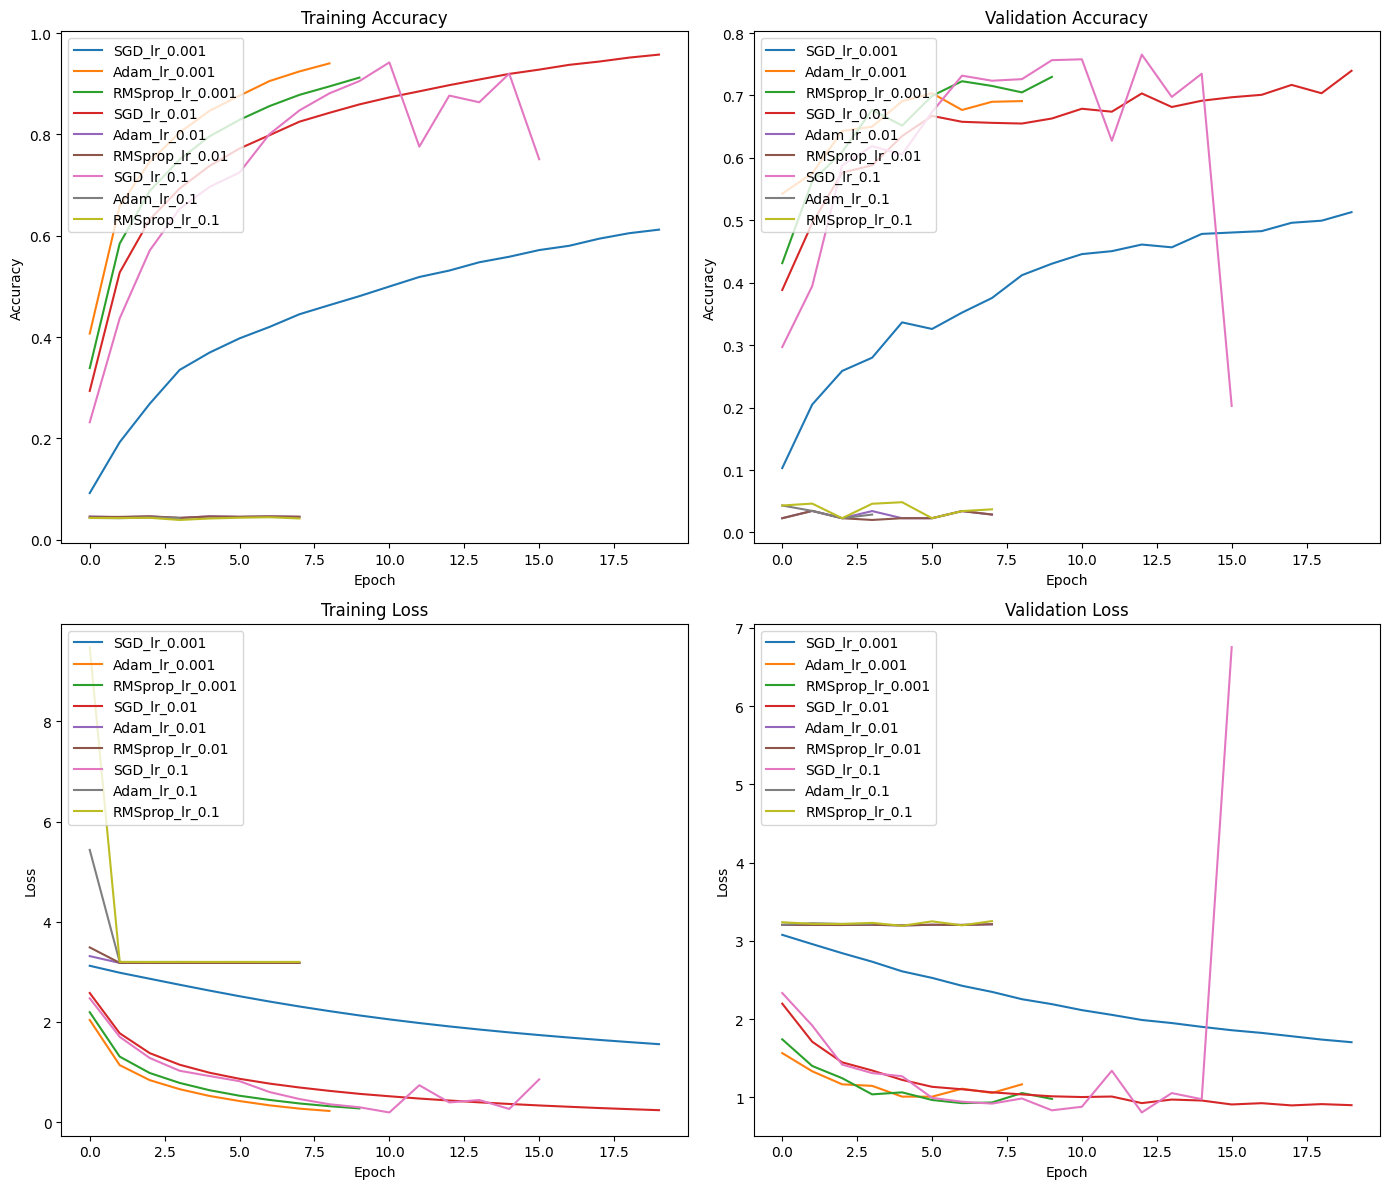

In [37]:
import matplotlib.pyplot as plt

def plot_comparison(histories):
    plt.figure(figsize=(14, 12))
    
    # Plot Training Accuracy
    plt.subplot(2, 2, 1)
    for key, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{key}')
    plt.title('Training Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot Validation Accuracy
    plt.subplot(2, 2, 2)
    for key, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{key}')
    plt.title('Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot Training Loss
    plt.subplot(2, 2, 3)
    for key, history in histories.items():
        plt.plot(history.history['loss'], label=f'{key}')
    plt.title('Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot Validation Loss
    plt.subplot(2, 2, 4)
    for key, history in histories.items():
        plt.plot(history.history['val_loss'], label=f'{key}')
    plt.title('Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# Example usage
plot_comparison(histories)


TODO: explain why data aug and early stop

### Optimize CNN model

## 3. Comparison, selection of best model & report final results